# **Importação de Bibliotecas e dataset**


---


Nesta secção, são importadas as bibliotecas utilizadas no projeto, assim como realizada a ingestão de um ficheiro CSV com o conteúdo de análise do projeto, carregado para um DataFrame utilizando a biblioteca Pandas.


In [ ]:
# Importação Bibliotecas
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Importar dados para dataframe
df = pd.read_csv("/content/Projeto _ Life Expectancy Data.csv")

# **Análise Exploratória de Dados**


---

Foi realizada uma pequena análise macro ao DataFrame para compreender a representação dos dados.

### Análise estrutura dataset.


---





O conjunto de dados (dataset) é composto por 2938 linhas e 22 colunas.

Através da função info(), é possível visualizar os tipos de dados das variáveis que constituem o DataFrame.

In [ ]:
# Analisar primeiras linhas do dataframe
print(df.head())

# Analisar o tipo de dados de cada elemento do dataframe
print(df.info())


       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

### Valores em falta no dataset.

Foi também possível verificar que existem algumas colunas com ausência de valores, nomeadamente:

    -Population: 652 valores;
    -Hepatitis B: 553 valores;
    -GDP: 448 valores;
    -Total expenditure: 226 valores;
    -Alcohol: 194 valores;
    -Income composition of resources: 167 valores;
    -Schooling: 163 valores;
    -BMI : 34 valores;
    -thinness 1-19 years: 34 valores;
    -thinness 5-9 years: 34 valores;
    -Polio: 19 valores;
    -iphtheria : 19 valores;
    -Life expectancy : 10 valores;
    -Adult Mortality: 10 valores;


*   Population: 652 valores;
*   Hepatitis B: 553 valores;
*   GDP: 448 valores;
*   Total expenditure: 226 valores;
*   Alcohol: 194 valores;
*   Income composition of resources: 167 valores;
*   Schooling: 163 valores;
*    BMI : 34 valores;
*    thinness  1-19 years: 34 valores;
*    thinness 5-9 years: 34 valores;
*   Polio: 19 valores;
*   Diphtheria : 19 valores;
*   Life expectancy : 10 valores;
*   Adult Mortality: 10 valores;


<Axes: >

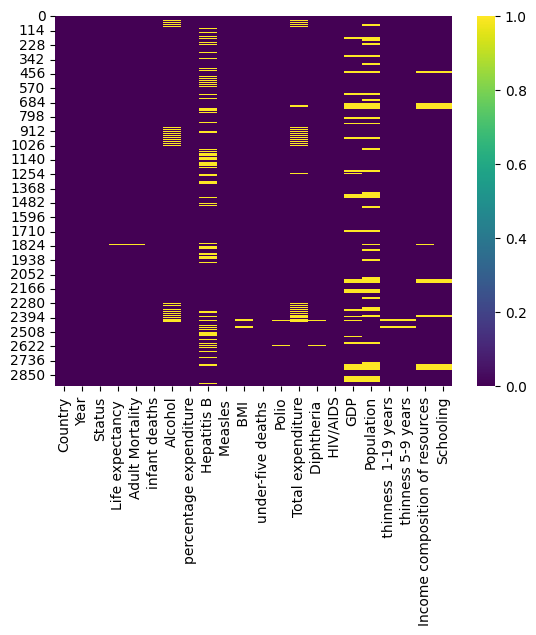

In [ ]:
# Obtenção de variaveis com ausência de valores ordenada de forma descendente
missing_values = df.isnull().sum()
missing_values_sorted = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values_list = [f"*   {col}: {val} valores;" for col, val in missing_values_sorted.items()]

# Apresentar lista de valores ausentes
formatted_missing_values = "\n".join(missing_values_list)
print(formatted_missing_values)

# Apresentar variaveis com ausência de valores visualmente
sns.heatmap(df.isna(), cmap='viridis')

## Análise descritiva geral


---

"Os dados da amostra abrangem uma série de variáveis relacionadas com saúde, economia e demografia. Seguem-se as principais observações:

O dataset está representado temporalmente ao longo de 15 anos, desde o ano 2000 até 2015.










In [ ]:
# Pequena Análise Descritiva às variáveis do dataset
#Variaveis Nominais
print(df.describe(include="O").T)
#Variaveis Numericas
print(df.describe().T)

        count unique          top  freq
Country  2938    193  Afghanistan    16
Status   2938      2   Developing  2426
                                  count          mean           std  \
Year                             2938.0  2.007519e+03  4.613841e+00   
Life expectancy                  2928.0  6.922493e+01  9.523867e+00   
Adult Mortality                  2928.0  1.647964e+02  1.242921e+02   
infant deaths                    2938.0  3.030395e+01  1.179265e+02   
Alcohol                          2744.0  4.602861e+00  4.052413e+00   
percentage expenditure           2938.0  7.382513e+02  1.987915e+03   
Hepatitis B                      2385.0  8.094046e+01  2.507002e+01   
Measles                          2938.0  2.419592e+03  1.146727e+04   
 BMI                             2904.0  3.832125e+01  2.004403e+01   
under-five deaths                2938.0  4.203574e+01  1.604455e+02   
Polio                            2919.0  8.255019e+01  2.342805e+01   
Total expenditure           

### 1. Contagem nº de Registos por Estado de Desenvolvimento de País



---


De acordo com o Fundo Monetário Internacional (FMI), a população mundial está distribuída de forma desigual entre países desenvolvidos e em desenvolvimento. Aproximadamente 85% da população global vive em países em desenvolvimento. O dataset analisado reflete, de forma aproximada, as proporções acima referidas, com 17% da população representada por países desenvolvidos e 83% por países em desenvolvimento."

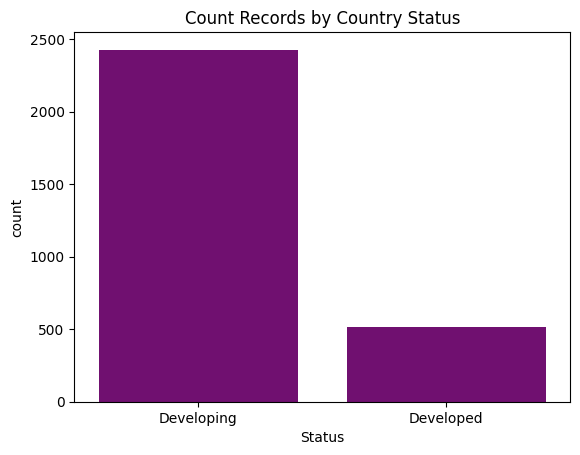

In [ ]:
# 1.Contagem nº de Registos por Estado de Desenvolvimento de País
sns.countplot(x='Status', data=df,color='purple')
plt.title('Count Records by Country Status')
plt.show()

### 2. Distribuição Gasto saúde como percentagem do PIB per capita


---



O gráfico no output apresenta a distribuição do gasto em saúde como percentagem do PIB per capita. Observa-se que a maior parte dos dados está concentrada em valores muito baixos, com uma longa cauda à direita, indicando uma distribuição assimétrica. Portanto os valores não estão uniformemente distribuídos em torno da média, a longa cauda à direita sugere que há alguns países ou observações com gastos em saúde, como percentagem do PIB per capita, muito superiores à maioria dos valores dos restantes países.

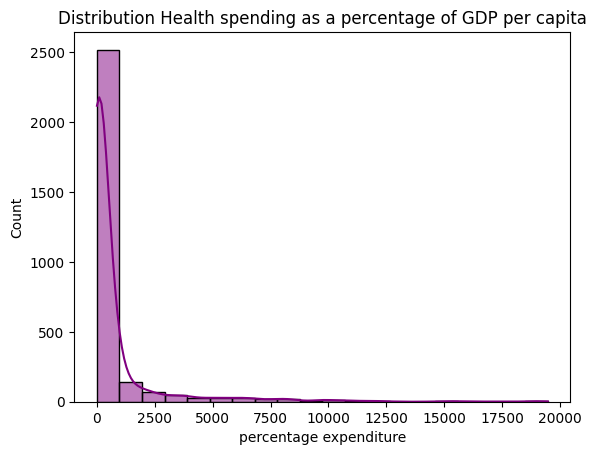

In [ ]:
# 2.Distribuição Gasto saúde como percentagem do PIB per capita
sns.histplot(df['percentage expenditure'], bins=20, kde=True,color='purple')
plt.title('Distribution Health spending as a percentage of GDP per capita')
plt.show()

### 3.Evolução Distribuição Esperança de Vida ao longo dos Anos


---



Analisando a distribuição da variável 'Esperança de Vida' ao longo dos anos, com base nos gráficos abaixo, observa-se uma melhoria geral na esperança de vida global ao longo do período analisado (2000-2015). Nos anos mais recentes, a distribuição mostra-se mais homogénea.

De acordo com os dados amostrais, nota-se que a esperança média de vida tem vindo a aumentar consistentemente. Este aumento é evidente no deslocamento das distribuições para a direita (valores mais elevados) ao longo dos anos.







A esperança média de vida global é de 69,22 anos, variando entre 36,3 anos (provavelmente em países com maiores problemas de saúde) e 89 anos.

A mediana, com um valor de 72,1 anos, indica que metade dos países apresenta uma expectativa de vida superior à média.

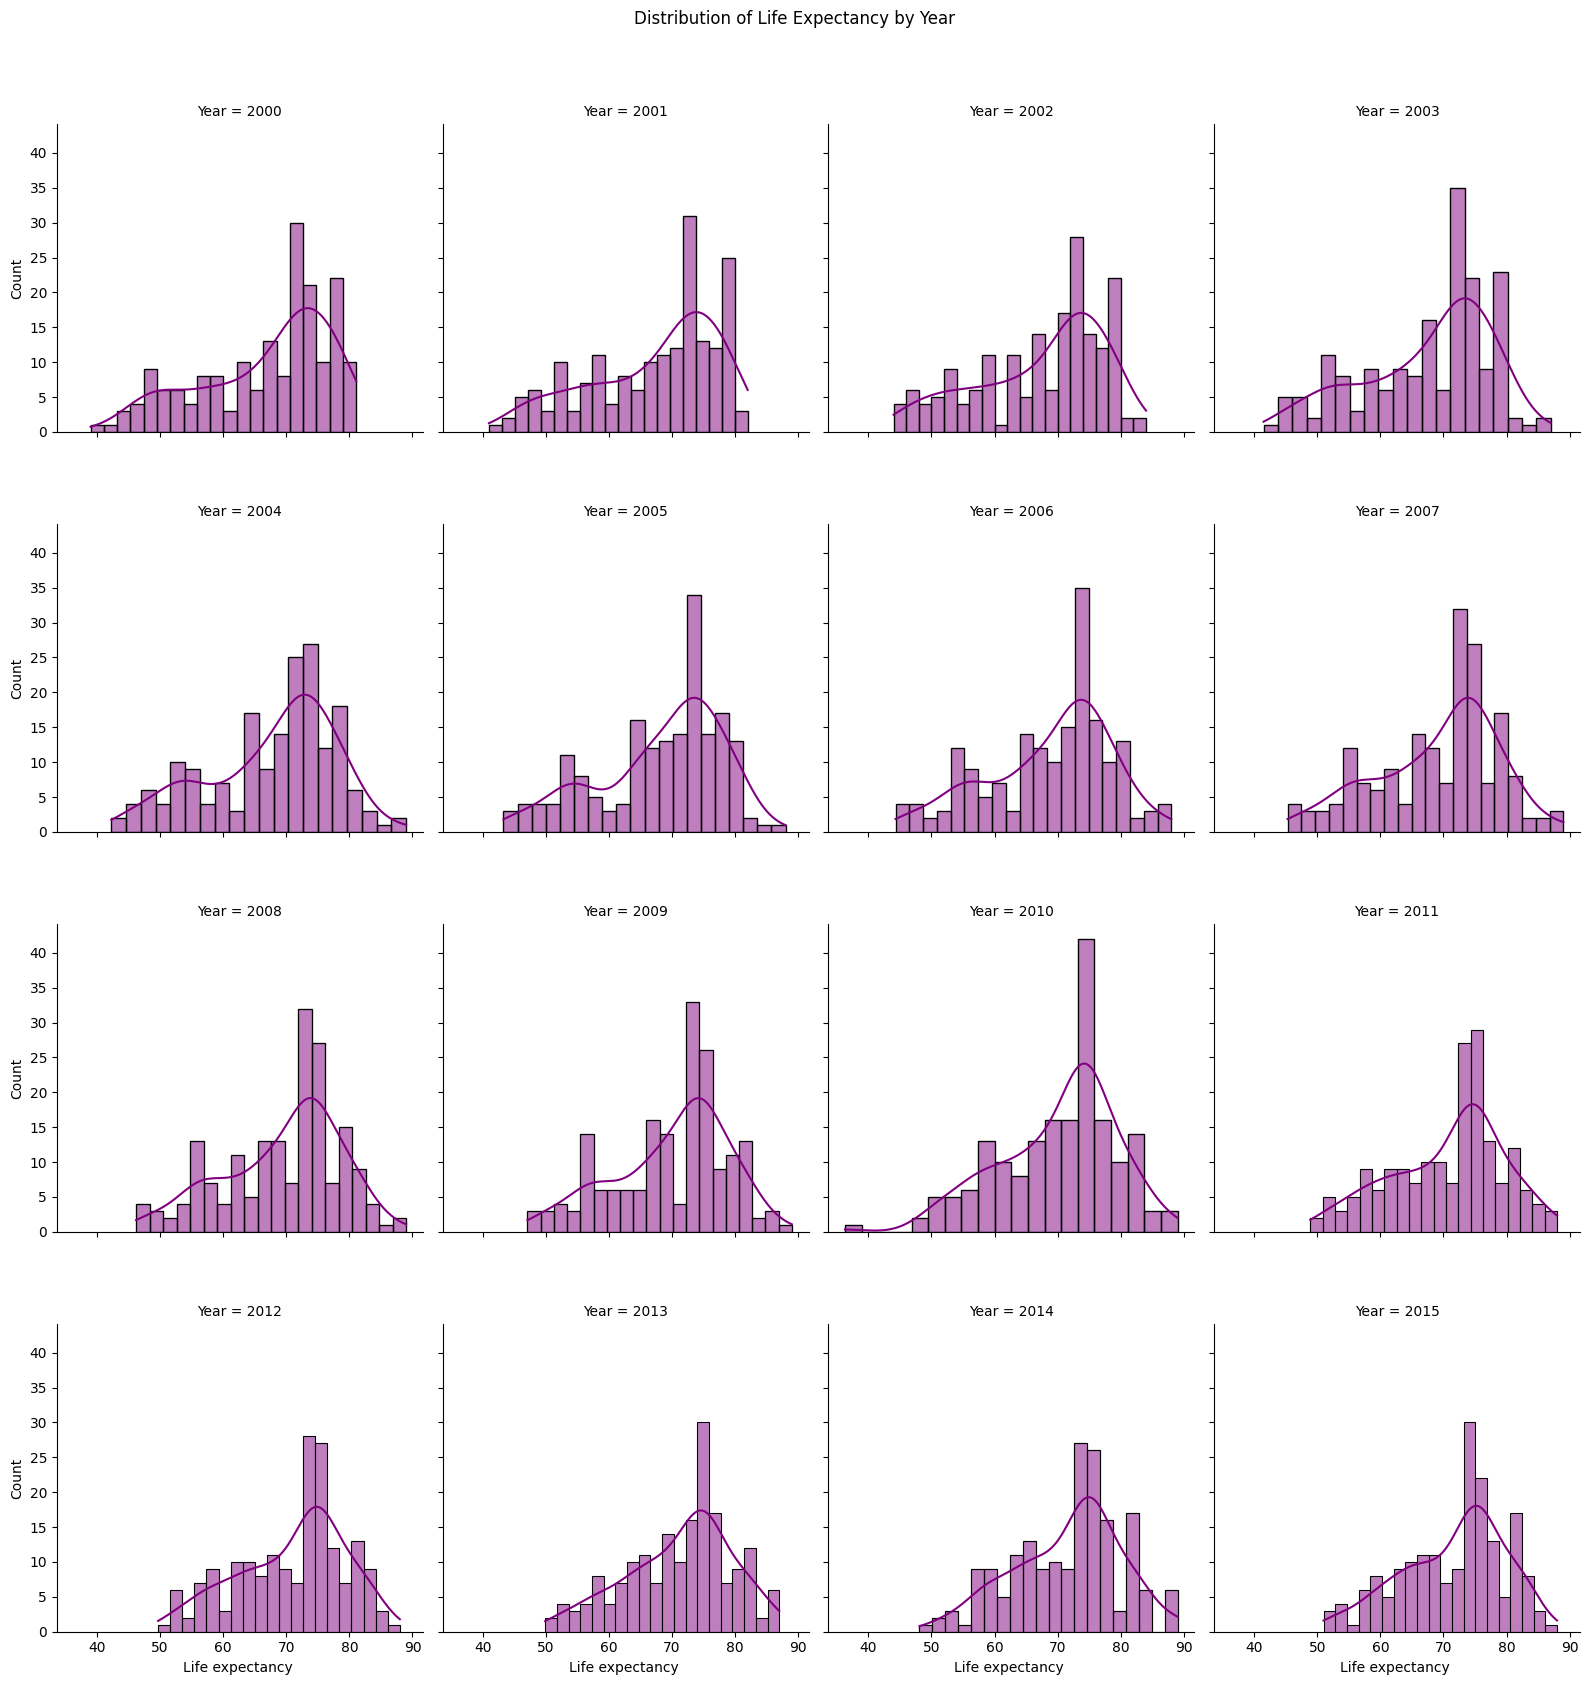

In [ ]:
# 3. Evolução Distribuição Esperança de Vida por ano
g = sns.FacetGrid(df, col="Year", col_wrap=4, height=4, sharex=True, sharey=True)
g.map(sns.histplot, "Life expectancy ", bins=20, kde=True,color='purple')
g.fig.suptitle('Distribution of Life Expectancy by Year', y=1.05)
g.fig.subplots_adjust(hspace=0.3)
plt.show()


## 4.Comparação esperança de vida em países desenvolvidos e em desenvolvimento

---

Analisando a distribuição da variável 'Esperança de Vida' por meio da variável 'Status' no gráfico Box Plot, observa-se que, de acordo com a amostra, os países desenvolvidos apresentam uma maior esperança de vida, com uma distribuição mais concentrada em torno de valores elevados.

Nos países desenvolvidos, a esperança de vida média é de 79,20 anos, com uma menor variabilidade (desvio padrão de 3,93 anos), indicando uma distribuição mais homogénea em torno de valores elevados. O intervalo interquartil varia entre 76,8 e 81,7 anos, com um mínimo de 69,9 anos e um máximo de 89 anos.

Já nos países em desenvolvimento, a esperança de vida média é de 67,11 anos, apresentando uma maior variabilidade (desvio padrão de 9,01 anos). O intervalo interquartil situa-se entre 61,1 e 74 anos, com valores mínimos de 36,3 anos (indicando países em maior dificuldade) e máximos também de 89 anos, provavelmente em países que se aproximam de condições de países desenvolvidos.

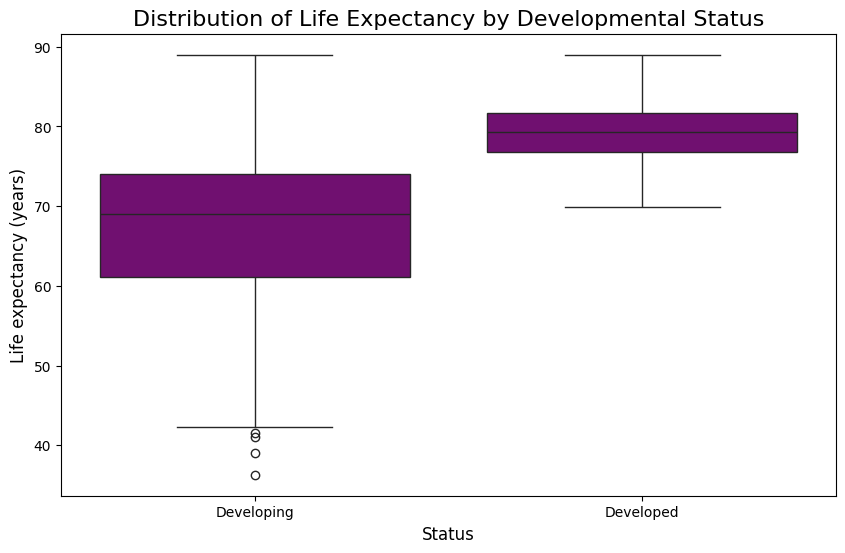

Status
Developed     3.930942
Developing    9.006092
Name: Life expectancy , dtype: float64
            0.25  0.75   IQR
Status                      
Developed   76.8  81.7   4.9
Developing  61.1  74.0  12.9


In [ ]:
# 4.Comparação esperança de vida em países desenvolvidos e em desenvolvimento
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Life expectancy ', data=df, color='purple')
plt.title('Distribution of Life Expectancy by Developmental Status', fontsize=16)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Life expectancy (years)', fontsize=12)
plt.show()

# 4.1 Calcular o desvio padrão por variavel "Status"
filtered_data_status_life_expectancy = df[['Status', 'Life expectancy ']].dropna()
std_dev_per_status = filtered_data_status_life_expectancy.groupby('Status')['Life expectancy '].std()
print(std_dev_per_status)

# 4.2 Calcular os quartis (25º e 75º) para cada Status
iqr_per_status = filtered_data_status_life_expectancy.groupby('Status')['Life expectancy '].quantile([0.25, 0.75]).unstack()
iqr_per_status['IQR'] = iqr_per_status[0.75] - iqr_per_status[0.25]
# Exibir intervalo interquartil
print(iqr_per_status)

### 5. Relação entre PIB per capita (GDP) e Esperança de Vida


---


No gráfico do output seguinte, 'Relação entre PIB e Esperança Média de Vida', observa-se uma tendência positiva: à medida que o PIB per capita aumenta, a esperança de vida tende a ser maior.

Os países desenvolvidos apresentam um PIB per capita mais elevado e uma esperança de vida concentrada na faixa superior (acima dos 75 anos). Por outro lado, os países em desenvolvimento, com PIB mais baixo, exibem uma maior dispersão nos valores da esperança de vida.

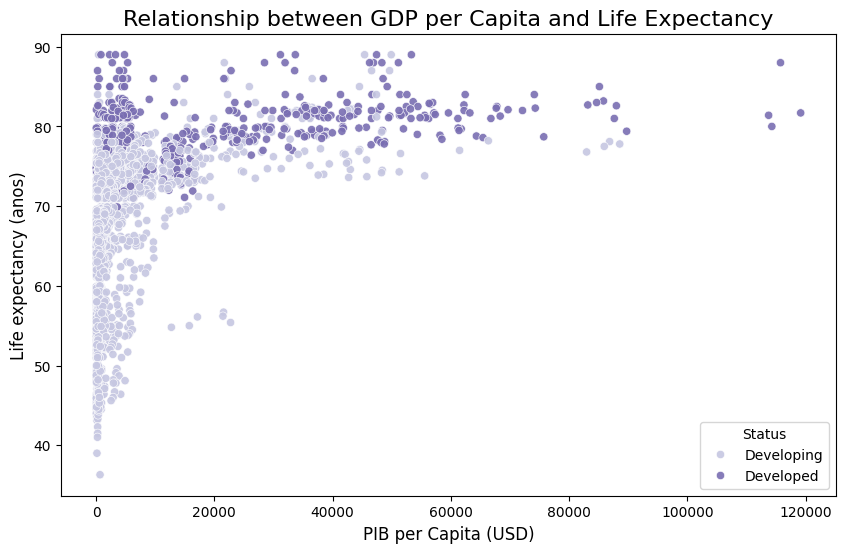

In [ ]:
# 5.Relação entre PIB per capita (GDP) e Esperança de Vida
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Life expectancy ', hue='Status', data=df, palette='Purples', alpha=0.9)
plt.title('Relationship between GDP per Capita and Life Expectancy', fontsize=16)
plt.xlabel('PIB per Capita (USD)', fontsize=12)
plt.ylabel('Life expectancy (anos)', fontsize=12)
plt.legend(title='Status')
plt.show()

### 6. Correlação entre variáveis saude e socioeconomicas


---

No gráfico de Matriz de correlação de variaveis apresentado no output, confirmamos que existem variáveis socioeconómicas, como PIB, educação e gasto em saúde, estão fortemente associadas a melhores indicadores de saúde, como maior esperança de vida e menor mortalidade adulta.


Fortes correlações positivas com a Esperança de Vida:

Educação  apresenta a correlação mais forte com a esperança de vida (
𝑟=0.75). Isto sugere que países com maior nível de escolaridade tendem a ter melhores indicadores de saúde.
Índice de Massa Corporal e PIB também mostram correlações positivas com a esperança de vida (𝑟=0.57 e 𝑟=0.46, respetivamente). Isto sugere que melhores condições económicas e uma saúde física equilibrada poderão estar relacionadas com maior longevidade.

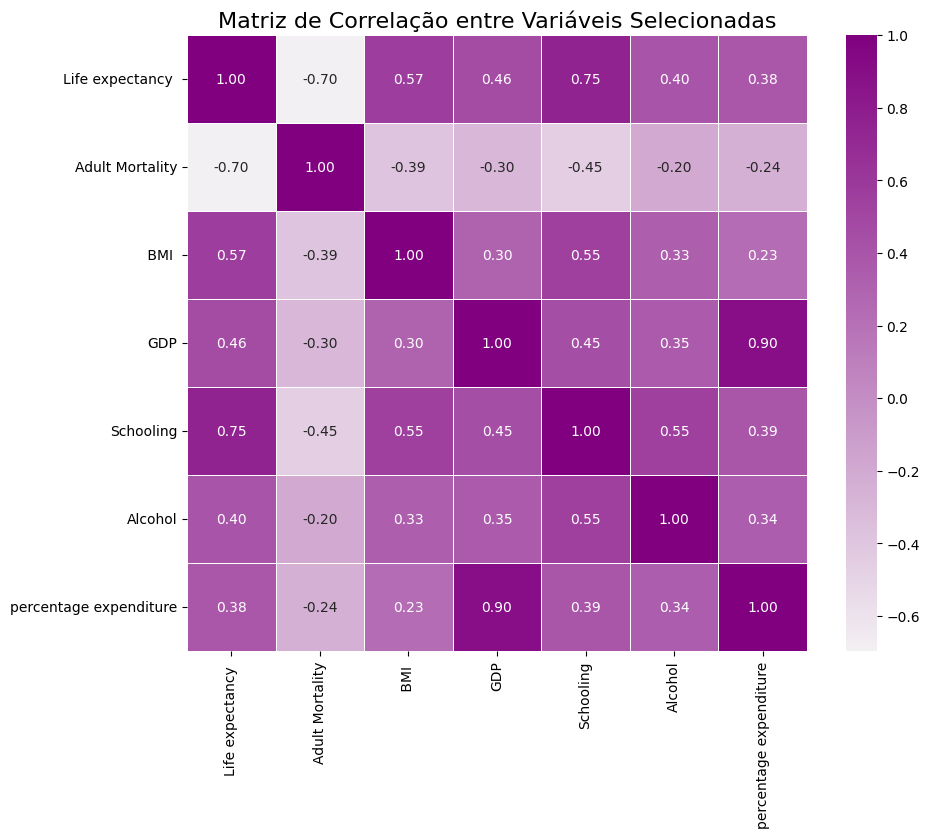

In [ ]:
# 6.Correlação entre variáveis saude e socioeconomicas
purple_cmap = sns.light_palette("purple", as_cmap=True)

correlation_features = ['Life expectancy ', 'Adult Mortality', ' BMI ', 'GDP',
'Schooling', 'Alcohol', 'percentage expenditure']
correlation_matrix = df[correlation_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=purple_cmap, fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Selecionadas', fontsize=16)
plt.show()

## Tratamento dos Dados


---



As variáveis 'Esperança de Vida' e 'PIB' foram selecionadas por serem necessárias para os testes estatísticos apresentados nos pontos seguintes. Ambas as variáveis, segundo a amostra, têm vindo a crescer ao longo dos anos. Assim, decidi, em primeiro lugar, apurar os valores em falta através dos seguintes métodos:


1.   Interpolação Temporal: Preencher os valores ausentes com base numa interpolação, capturando tendências temporais dentro de cada país;
2.   Média Agrupada por Ano/Nível de Desenvolvimento: Caso o método anterior não preencha todos os valores em falta, este método mais simples aplicará a média da variável, agrupada por ano e nível de desenvolvimento do país.


### Informação Visual de Valores em falta das variaveis referidas antes do tratamento.

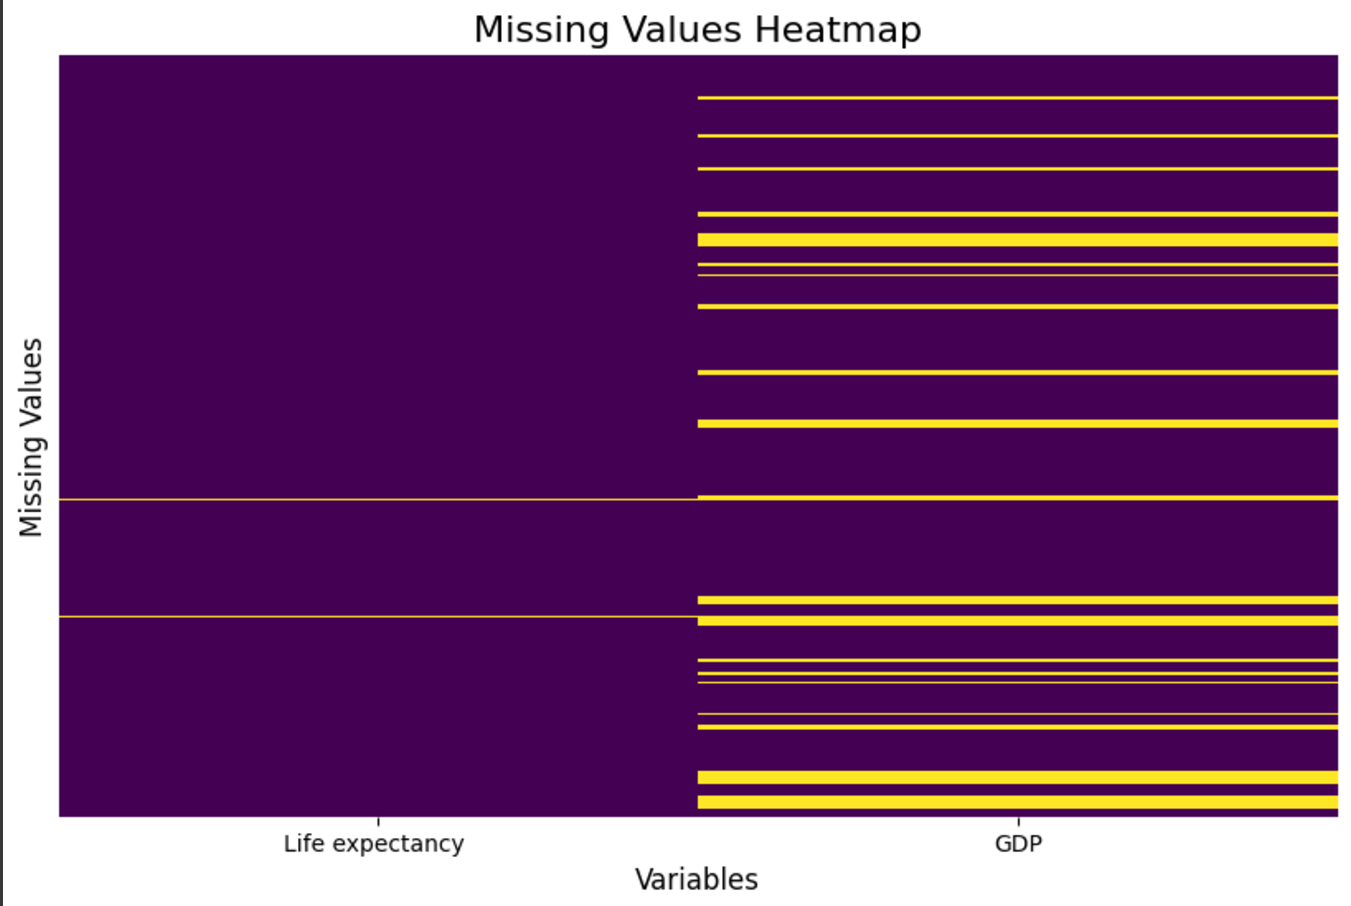

### Informação Visual de Valores em falta das variaveis referidas antes do tratamento.


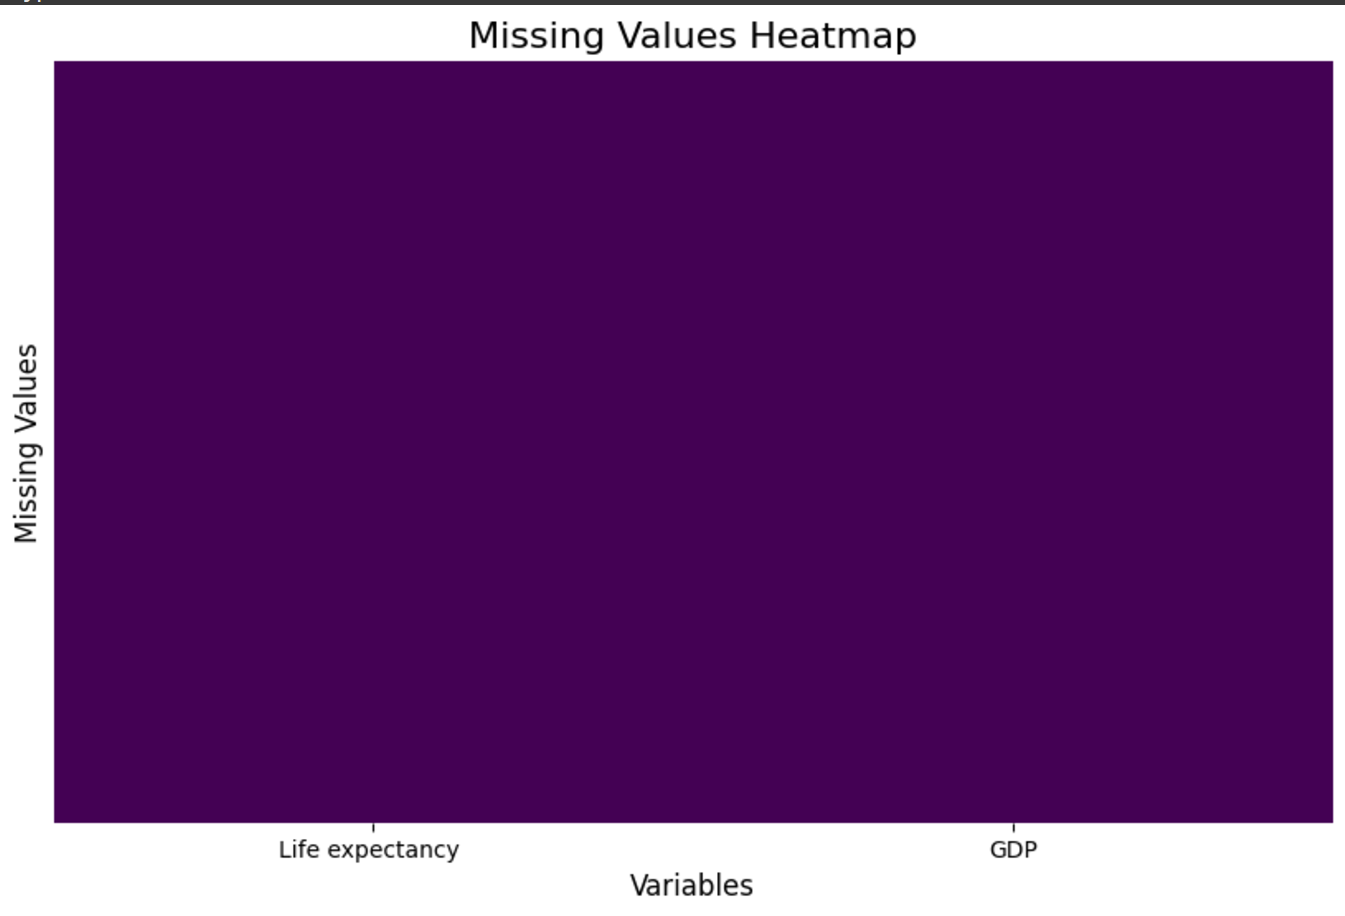

In [ ]:
### Funções criadas para tratamento dos dados

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


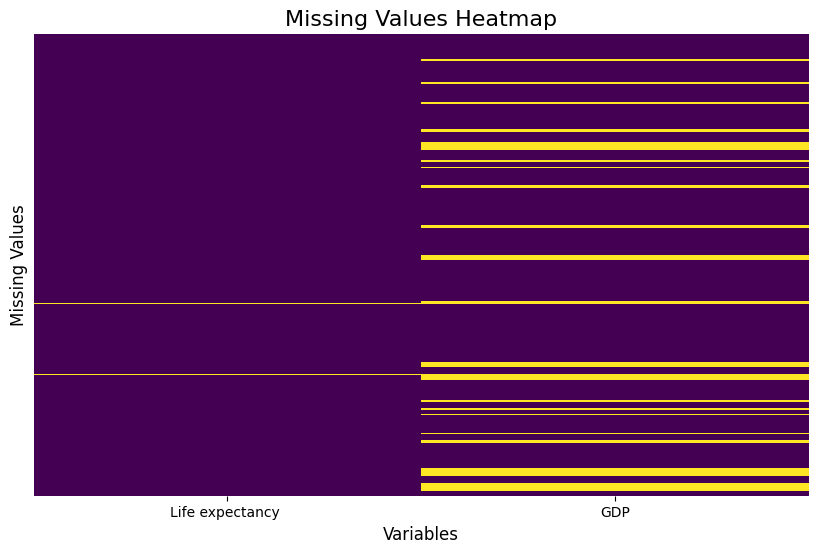

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                  0
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


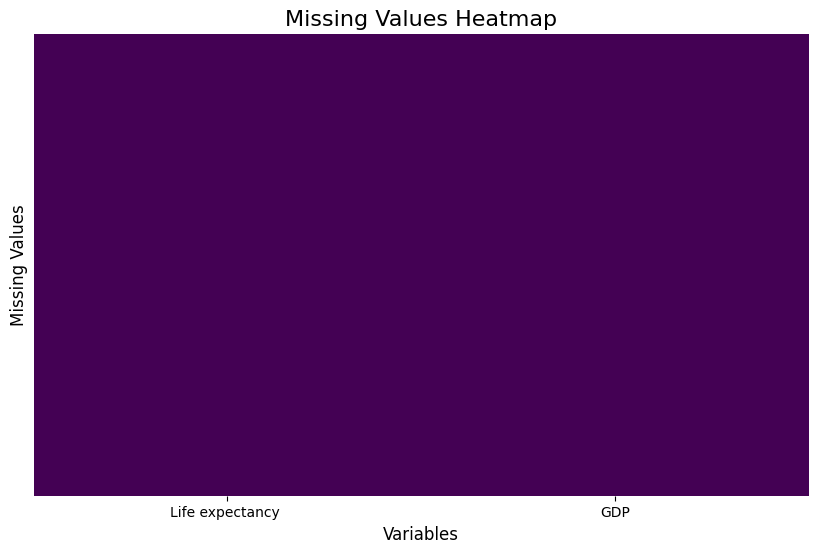

In [ ]:

def fill_missing_values_average(columns_to_impute_mean,columns_group):
  for col in columns_to_impute_mean:
    #Preencher com a média das colunas agrupadas
    df[col] = df.groupby(columns_group)[col].transform(
        lambda x: x.fillna(x.mean())
        )
    df[col].fillna(df[col].mean())  # Preencher restantes com a média global

def fill_missing_values_lin_interpolation(columns_to_interpolate,columns_group):
  for col in columns_to_interpolate:
    df[col] = df.groupby(columns_group)[col].transform(
    lambda x: x.interpolate(method='linear'))

def generate_heatmap_missing_values(columns_to_check,title,xlabel,ylabel):
  heatmap_data = df[columns_to_check].isna()
  # Criar o mapa de calor
  plt.figure(figsize=(10, 6))
  sns.heatmap(heatmap_data, cmap='viridis', cbar=False, yticklabels=False)
  plt.title(title, fontsize=16)
  plt.xlabel(xlabel, fontsize=12)
  plt.ylabel(ylabel, fontsize=12)
  plt.show()

# Visualização Valores em Falta, variaveis selecionadas antes de tratamento
print(df.isnull().sum())
columns_to_check_missing_values = ['Life expectancy ','GDP']
generate_heatmap_missing_values(columns_to_check_missing_values,'Missing Values Heatmap','Variables','Missing Values')

# 1.Tentativa de Preencher Valores em falta através Interporação Temporal
columns_to_interpolate = ['Life expectancy ','GDP']
columns_group = ['Country']
fill_missing_values_lin_interpolation(columns_to_interpolate,columns_group)

# 2.Tentativa de Preencher Valores em falta através média agrupada
columns_to_impute_mean = ['Life expectancy ','GDP']
columns_group = ['Year', 'Status']
fill_missing_values_average(columns_to_impute_mean,columns_group)

# Visualização Valores em Falta, variaveis selecionadas pós tratamento
print(df.isnull().sum())
columns_to_check_missing_values = ['Life expectancy ','GDP']
generate_heatmap_missing_values(columns_to_check_missing_values,'Missing Values Heatmap','Variables','Missing Values')



# Qual o país com maior percentagem de crescimento entre 2000 e 2015 em termos de esperança média de vida (Life Expectancy)?



---



A função calculate_highest_life_expectancy_growth permite calcular o crescimento percentual da variável 'Esperança Média de Vida' de diferentes países entre dois anos específicos e identificar o país que apresentou o maior crescimento.

O país que apresentou o maior crescimento foi Zimbabwe com um crescimento percentual na ordem dos 45,65%

Abaixo, são apresentados os 10 países com a maior taxa de crescimento da 'Esperança Média de Vida'.

País com maior crescimento: Zimbabwe
Crescimento percentual: 45.65%


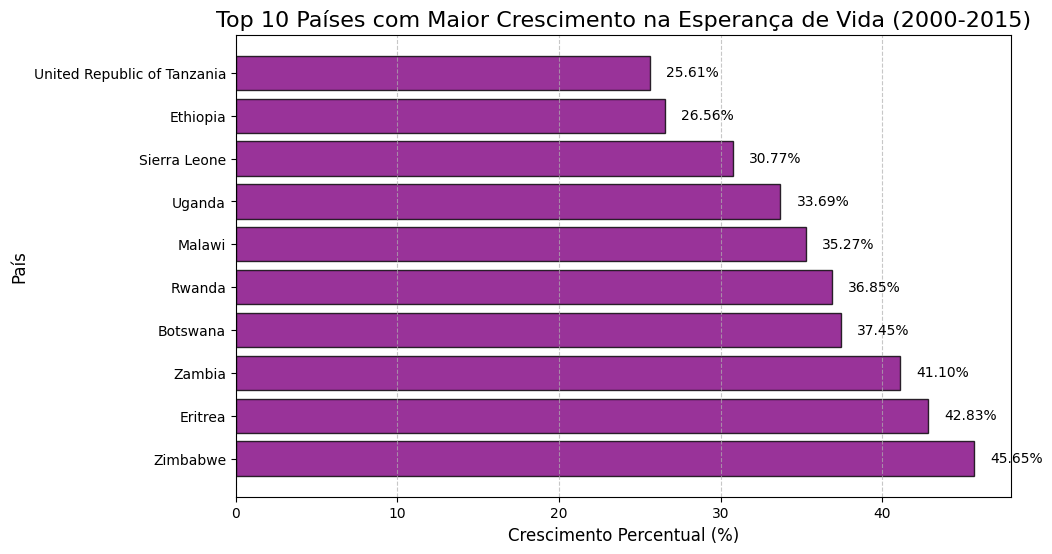

In [ ]:
def calculate_highest_life_expectancy_growth(df, year_start=2000, year_end=2015):
    """
    Calcula o crescimento percentual da esperança média de vida entre dois anos
    e retorna o país com maior crescimento e o DataFrame com todos os crescimentos.

    Parâmetros:
        df (pd.DataFrame): DataFrame com os dados.
        year_start (int): Ano inicial para o cálculo.
        year_end (int): Ano final para o cálculo.

    Retorna:
        tuple: (país com maior crescimento, valor do crescimento percentual, DataFrame de crescimento).
    """
    # Filtrar os dados para os anos especificados
    df_filtered = df[df['Year'].isin([year_start, year_end])]

    # Criar tabela pivô com as colunas de interesse
    growth = df_filtered.pivot(index='Country', columns='Year', values='Life expectancy ')

    # Calcular o crescimento percentual
    growth['Growth (%)'] = ((growth[year_end] - growth[year_start]) / growth[year_start]) * 100

    # Identificar o país com maior crescimento
    highest_growth_country = growth['Growth (%)'].idxmax()
    highest_growth_value = growth['Growth (%)'].max()

    return highest_growth_country, highest_growth_value, growth


def plot_top_countries_growth(growth_df, top_n=10):
    """
    Gera um gráfico de barras horizontais para os países com maior crescimento percentual
    na esperança média de vida.

    Parâmetros:
        growth_df (pd.DataFrame): DataFrame contendo os dados de crescimento percentual.
                                  Deve ter colunas 'Growth (%)' e o índice como os nomes dos países.
        top_n (int): Número de países a exibir no gráfico. Default é 10.

    Retorna:
        None. Exibe o gráfico.
    """
    # Obter os países com maior crescimento percentual
    top_countries = growth_df.nlargest(top_n, 'Growth (%)')

    # Preparar dados para gráfico
    countries = top_countries.index
    growth_values = top_countries['Growth (%)']

    # Criar o gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.barh(countries, growth_values, color='purple', alpha=0.8, edgecolor='black')
    plt.title(f'Top {top_n} Países com Maior Crescimento na Esperança de Vida (2000-2015)', fontsize=16)
    plt.xlabel('Crescimento Percentual (%)', fontsize=12)
    plt.ylabel('País', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Adicionar valores ao lado das barras
    for i, v in enumerate(growth_values):
        plt.text(v + 1, i, f"{v:.2f}%", va='center', fontsize=10)

    plt.show()


# Calcular o maior crescimento e obter o DataFrame de crescimento
highest_growth_country, highest_growth_value, growth = calculate_highest_life_expectancy_growth(df)

print(f"País com maior crescimento: {highest_growth_country}")
print(f"Crescimento percentual: {highest_growth_value:.2f}%")

# Gerar o gráfico para os 10 países com maior crescimento
plot_top_countries_growth(growth, top_n=10)



# O PIB (GDP) dos países em 2015 é superior ao que era em 2000? Faz o teste estatístico e explica o porquê de ter escolhido esse teste e os passos que fizeste.


---




O teste estatístico aplicado foi o Teste t para Amostras Dependentes, que é utilizado para comparar as médias de dois conjuntos de dados emparelhados. Neste caso, analisou-se o PIB de 2015 e 2000 para os mesmos países.

Hipóteses:

*   Hipotese Nula: O PIB dos paises em 2015 é menor ou igual aos de 2000.
*   Hipotese Alternativa: O PIB dos paises em 2015 são maior que no ano 2000.









**Resultados do Teste:**


---



Estatística do teste t: 3.5808688, esta medida reflete o desvio da diferença da média observada em relação à hipótese nula, ajustado pelo erro padrão das diferenças. Portanto o valor de 3.5808688 indica que a diferença observada entre o PIB médio de 2015 e 2000 está a 3.58 desvios padrão acima da expectativa assumida pela hipótese nula (ou seja, que não há crescimento significativo no PIB médio).
O facto do sinal ser positivo de reflete que a média do PIB em 2015 é maior do que a de 2000, em linha com a hipótese alternativa.

Como p-valor≈ 0.00022 < 0.05 , rejeitamos
hipote nula com um nível de confiança de 95%.

Com base no teste estatístico e na análise gráfica:
O PIB médio dos países em 2015 é significativamente maior do que em 2000.
A diferença média positiva (2527 USD) e a distribuição centrada em valores positivos corroboram esta conclusão.

Este resultado sugere que, em geral, houve crescimento económico global significativo entre 2000 e 2015. Contudo, a dispersão no gráfico também indica que alguns países tiveram desempenhos variáveis (com crescimentos menores ou até mesmo decréscimos de pib).



2527.652947662175 3.5808688044191106 0.0002196359837714995


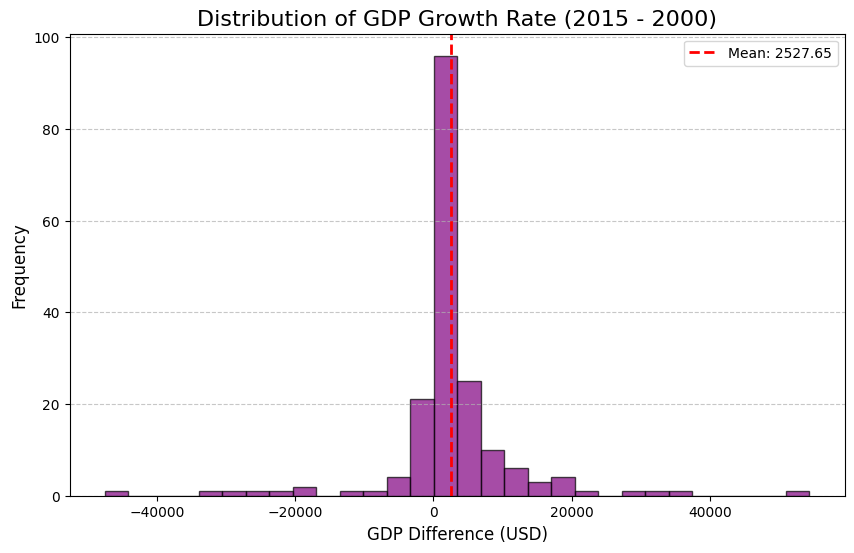

3.5808688044191106 0.0002196359837714995
Rejeitamos a hipótese nula. O PIB dos paises no ano 2015 é maior que no ano 2000.


In [ ]:
# Filtrar os dados para os anos 2000 e 2015
gdp_filtered = df[df['Year'].isin([2000, 2015])].pivot(index='Country', columns='Year', values='GDP')

# Calcular a diferença entre PIB de 2015 e 2000 para cada país
gdp_filtered['Difference'] = gdp_filtered[2015] - gdp_filtered[2000]

# Calcular a média da diferença
mean_difference = gdp_filtered['Difference'].mean()

# Teste t para amostras dependentes (pares)
t_statistic, p_value = stats.ttest_rel(gdp_filtered[2015], gdp_filtered[2000], alternative='greater')

print(mean_difference, t_statistic, p_value)

plt.figure(figsize=(10, 6))
plt.hist(gdp_filtered['Difference'], bins=30, alpha=0.7, edgecolor='black',color='purple')
plt.axvline(mean_difference, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_difference:.2f}")
plt.title('Distribution of GDP Growth Rate (2015 - 2000)', fontsize=16)
plt.xlabel('GDP Difference (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#Alternativa do teste em cima com o ttest1Samp
alpha = 0.05
stat_1samp, p_value_1samp = stats.ttest_1samp(gdp_filtered['Difference'], 0, alternative='greater')
print(stat_1samp, p_value_1samp)


if p_value < alpha and p_value_1samp < alpha:
    print("Rejeitamos a hipótese nula. O PIB dos paises no ano 2015 é maior que no ano 2000.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidência suficiente para concluir que o PIB dos paises no ano 2015 é maior que no ano 2000.")


# A esperança média de vida num país em desenvolvimento é a mesma que num país desenvolvido? Faz o teste estatístico e explica o porquê de ter escolhido esse teste e os passos que fizeste.


---

O teste estatístico aplicado foi o Teste t para Amostras Independentes, que é utilizado para comparar as médias de dois conjuntos de dados independentes. Neste caso, analisou-se a variável Esperança média de Vida dum pais em desenvolvimento com um pais desenvolvido.

Hipóteses:

*   Hipotese Nula: Esperança de Média de Vida num pais em Desenvolvimento é a igual à Esperança Média de Vida num pais Desenvolvido;
*   Hipotese Alternativa: Esperança de Média de Vida num pais em Desenvolvimento é diferente que num pais Desenvolvido.




Este teste foi escolhido porque estamos a comparar a média de duas populações independentes:
Países desenvolvidos.
Países em desenvolvimento.


No teste t para amostras independentes, caso as variâncias dos grupos sejam significativamente diferentes e não definamos o parâmetro "equal_var=False", o teste t assume erroneamente que as variâncias são iguais. Isto pode levar a p-valores incorretos e, consequentemente, a decisões erradas sobre as hipóteses. Assim, adicionalmente, foi utilizado o teste de Levene, que verifica a homogeneidade das variâncias das amostras independentes. Consoante o resultado deste, é ajustado o parâmetro "equal_var" no teste t.

**Output:**

Média de Esperança de Vida (países desenvolvidos): 79.20 anos.
Média de Esperança de Vida (países em desenvolvimento): 67.11 anos.
Estatística do teste: 47.93
p-valor:0

**Conclusão**


---



Sendo o p-valor igual a zero, rejeitamos a hipótese nula. A média das duas amostras indepedentes são diferentes.

Concluímos assim estatisticamente que a esperança média de vida num país em desenvolvimento não é a mesma que num país desenvolvido!







In [ ]:
# Filtrar os dados para países desenvolvidos e em desenvolvimento
developed = df[df['Status'] == 'Developed']['Life expectancy ']
developing = df[df['Status'] == 'Developing']['Life expectancy ']

# Utilização de teste levene, para verificar a homogeneidade de variâncias entre as amostras independentes.
alpha= 0.05
stat_levene, p_value_levene = stats.levene(developed, developing)
print(stat_levene, p_value_levene)
if p_value_levene < alpha:
    equal_group_variances = False
else:
    equal_group_variances = True

# Teste estatístico: Teste t de Student para amostras independentes
stat, p_value = stats.ttest_ind(developed, developing,equal_var=equal_group_variances)

if p_value < alpha:
    print("Rejeitamos a hipótese nula. As médias das populações são diferentes.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidência suficiente para concluir As médias das populações são diferentes.")

print(developed.mean(), developing.mean(), stat, p_value)

280.0369280598758 4.1224696746741854e-60
Rejeitamos a hipótese nula. As médias das populações são diferentes.
79.1978515625 67.12021614627409 47.934842925730884 0.0
